In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit import transpile
from scipy.stats import unitary_group
import matplotlib.pyplot as plt
import time

In [2]:
def cnot_count(qc: QuantumCircuit):
    count_ops = qc.count_ops()
    if 'cx' in count_ops:
        return count_ops['cx']
    return 0


def cz_count(qc: QuantumCircuit):
    count_ops = qc.count_ops()
    if 'cz' in count_ops:
        return count_ops['cz']
    return 0

In [3]:
n_gates = []
times = []
for n_qubits in range(1, 8):
    
    circuit = QuantumCircuit(n_qubits)
    # print(n_qubits)
    init_unitary_mat = unitary_group.rvs(2**n_qubits)
    circuit.append(Operator(init_unitary_mat), list(range(n_qubits)))
    start_time = time.time()
    circuit = transpile(circuit, optimization_level=3, basis_gates=['u', 'cz'])
    end_time = time.time()
    # print(circuit)
    print(n_qubits)
    print('gate = ', len(circuit))
    print('#two-qubit gates = ', cnot_count(circuit) + cz_count(circuit))
    print('depth = ', circuit.depth())
    print('time', end_time - start_time)
    print('finish')
    
    n_gates.append(len(circuit))
    times.append(end_time - start_time)
    

/Users/siwei/miniforge3/envs/tf2/lib/python3.8/site-packages/numpy/linalg/linalg.py:2147: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/siwei/miniforge3/envs/tf2/lib/python3.8/site-packages/numpy/linalg/linalg.py:2147: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


gate =  1
#two-qubit gates =  0
depth =  1
time 0.02892780303955078
finish
gate =  11
#two-qubit gates =  3
depth =  7
time 0.008006095886230469
finish
gate =  58
#two-qubit gates =  20
depth =  41
time 0.054763078689575195
finish
gate =  270
#two-qubit gates =  100
depth =  197
time 0.24710583686828613
finish
gate =  1166
#two-qubit gates =  444
depth =  869
time 0.8893778324127197
finish
gate =  4846
#two-qubit gates =  1868
depth =  3653
time 4.180285930633545
finish


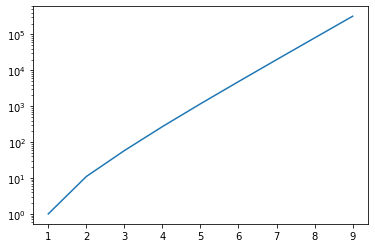

In [ ]:
plt.plot(list(range(1, len(n_gates)+1)), n_gates)
plt.yscale('log')
plt.savefig('motivation_#gate_qsd')
plt.show()

In [ ]:
plt.plot(list(range(1, len(n_gates)+1)), times)
plt.yscale('log')
plt.savefig('motivation_#gate_qsd')
plt.show()

NameError: name 'times' is not defined